# ｋ平均法（ワインの品質判定）

* 設定
 - ワインの品質判定データを使用して教師無し学習をしてみる。
 - クラスタリングを行う。
* 課題
 - ｋ平均法（ｋ-ｍｅａｎｓ）を使用してクラスタ分類を行う。

In [ ]:
#https://datahexa.com/kmeans-clustering-with-wine-dataset/参考

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets

from sklearn.cluster import KMeans

In [ ]:
wine = datasets.load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
X = wine.data

In [ ]:
X.shape

(178, 13)

In [ ]:
y=wine.target

In [ ]:
y.shape

(178,)

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## ｋ平均法によるクラスタリング

In [ ]:
model = KMeans(n_clusters=3)
# model = KMeans(n_clusters=3, init='k-means++', n_init=1000, max_iter=10000, tol=1e-05, precompute_distances=True, verbose=0)

In [ ]:
labels = model.fit_predict(X)

In [ ]:
df = pd.DataFrame({'labels': labels})
type(df)

pandas.core.frame.DataFrame

In [ ]:
def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

In [ ]:
df['species'] = [species_label(theta) for theta in wine.target]

In [ ]:
pd.crosstab(df['labels'], df['species'])

species,class_0,class_1,class_2
labels,,,
0,13,20,29
1,0,50,19
2,46,1,0


## データの標準化によるクラスタ分類の向上
StandardScalerを使用してデータの標準化を行う事によってクラスタリングの向上を図る。

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaler.fit(X)

S = scaler.transform(X)
result = model.fit(S)
df = pd.DataFrame({'labels': result.labels_})

def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

df['species'] = [species_label(theta) for theta in wine.target]
pd.crosstab(df['labels'], df['species'])



species,class_0,class_1,class_2
labels,,,
0,0,3,48
1,0,65,0
2,59,3,0


データの標準化を図ると、上の場合と比較してより良いクラスタリングの結果が出た。


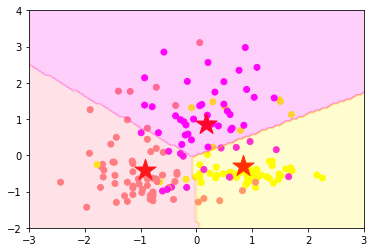

In [ ]:
# 結果の出力と可視化
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

plt.scatter(S[:,0], S[:,1], c=result.labels_, alpha=1.0, cmap='spring')
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=500, marker='*', c='red')

# 領域の可視化
xx0, xx1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-2, 4, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T
pred = np.empty(len(xx), dtype=int)
for i, x in enumerate(xx):
    d = distance(x, result.cluster_centers_[:,:2])
    pred[i] = np.argmin(d)
plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')